### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('Dilmah.csv')

In [4]:
df.head()

,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.)
0,6/19/24,1015.0,1015.0,1000.00,1015.75,9,49,49030.0
1,6/18/24,1001.0,1001.0,1000.25,1015.75,3,15,15007.5
2,6/14/24,1000.0,1000.0,1000.00,1015.75,1,29,29000.0
3,6/13/24,1020.0,1020.0,1000.00,1015.75,4,57,57034.0
4,6/12/24,1015.0,1023.5,1000.00,1015.75,12,164,166577.5


In [5]:
df

,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.)
0,6/19/24,1015.0,1015.00,1000.00,1015.75,9,49,49030.0
1,6/18/24,1001.0,1001.00,1000.25,1015.75,3,15,15007.5
2,6/14/24,1000.0,1000.00,1000.00,1015.75,1,29,29000.0
3,6/13/24,1020.0,1020.00,1000.00,1015.75,4,57,57034.0
4,6/12/24,1015.0,1023.50,1000.00,1015.75,12,164,166577.5
...,...,...,...,...,...,...,...,...
2936,10/17/91,NaN,150.00,150.00,150.00,1,100,15000.0
2937,10/16/91,NaN,148.00,148.00,148.00,1,50,7400.0
2938,10/11/91,NaN,132.25,132.25,132.25,3,200,26450.0
2939,10/10/91,NaN,130.25,130.25,130.25,2,200,26050.0


In [6]:
df['Trade Date'] = pd.to_datetime(df['Trade Date'])

# Define the date range for the last 10 years
end_date = df['Trade Date'].max()
start_date = end_date - pd.DateOffset(years=10)

# Filter the DataFrame to include only the last 10 years of data
filtered_df = df[(df['Trade Date'] >= start_date) & (df['Trade Date'] <= end_date)]

# Display the filtered DataFrame
print(filtered_df)

     Trade Date  Open (Rs.)  High (Rs.)  Low (Rs.)  Close (Rs.)  TradeVolume  \
0    2024-06-19      1015.0      1015.0    1000.00      1015.75            9   
1    2024-06-18      1001.0      1001.0    1000.25      1015.75            3   
2    2024-06-14      1000.0      1000.0    1000.00      1015.75            1   
3    2024-06-13      1020.0      1020.0    1000.00      1015.75            4   
4    2024-06-12      1015.0      1023.5    1000.00      1015.75           12   
...         ...         ...         ...        ...          ...          ...   
1529 2014-06-30       710.0       715.0     710.00       714.10            4   
1530 2014-06-27       700.0       700.0     700.00       700.00            1   
1531 2014-06-26       700.0       700.0     700.00       700.00            1   
1532 2014-06-24       700.0       700.0     700.00       700.00            1   
1533 2014-06-23       699.9       699.9     699.90       699.90            1   

      ShareVolume  Turnover (Rs.)  
0  

C:\Users\udith\AppData\Local\Temp\ipykernel_7536\4235463591.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Trade Date'] = pd.to_datetime(df['Trade Date'])


In [7]:
filtered_df.tail()

,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.)
1529,2014-06-30,710.0,715.0,710.0,714.1,4,58,41420.0
1530,2014-06-27,700.0,700.0,700.0,700.0,1,100,70000.0
1531,2014-06-26,700.0,700.0,700.0,700.0,1,1,700.0
1532,2014-06-24,700.0,700.0,700.0,700.0,1,1,700.0
1533,2014-06-23,699.9,699.9,699.9,699.9,1,1,699.9


In [8]:
df1=filtered_df.reset_index()['Close (Rs.)']

In [9]:
df1

0       1015.75
1       1015.75
2       1015.75
3       1015.75
4       1015.75
         ...   
1529     714.10
1530     700.00
1531     700.00
1532     700.00
1533     699.90
Name: Close (Rs.), Length: 1534, dtype: float64

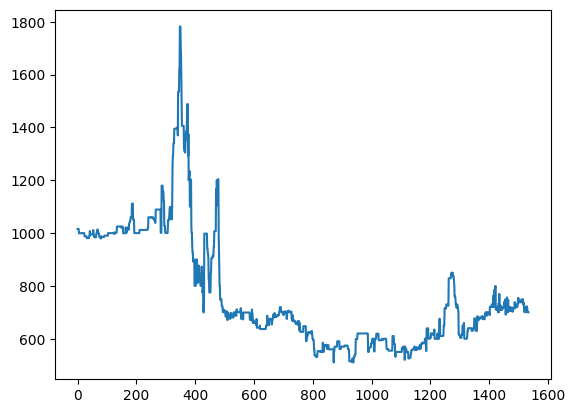

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [12]:
import numpy as np

In [13]:
df1

0       1015.75
1       1015.75
2       1015.75
3       1015.75
4       1015.75
         ...   
1529     714.10
1530     700.00
1531     700.00
1532     700.00
1533     699.90
Name: Close (Rs.), Length: 1534, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
print(df1)

[[0.39739862]
 [0.39739862]
 [0.39739862]
 ...
 [0.14924552]
 [0.14924552]
 [0.14916693]]


In [16]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(997, 537)

In [18]:
train_data

array([[3.97398617e-01],
       [3.97398617e-01],
       [3.97398617e-01],
       [3.97398617e-01],
       [3.97398617e-01],
       [3.84430997e-01],
       [3.84430997e-01],
       [3.84627476e-01],
       [3.84627476e-01],
       [3.84627476e-01],
       [3.84627476e-01],
       [3.84627476e-01],
       [3.84627476e-01],
       [3.84627476e-01],
       [3.85020434e-01],
       [3.85020434e-01],
       [3.85020434e-01],
       [3.85020434e-01],
       [3.85020434e-01],
       [3.85020434e-01],
       [3.85020434e-01],
       [3.85020434e-01],
       [3.85020434e-01],
       [3.85020434e-01],
       [3.75196479e-01],
       [3.75196479e-01],
       [3.75196479e-01],
       [3.75196479e-01],
       [3.75196479e-01],
       [3.75196479e-01],
       [3.75589437e-01],
       [3.75589437e-01],
       [3.70088023e-01],
       [3.70088023e-01],
       [3.70088023e-01],
       [3.70088023e-01],
       [3.70088023e-01],
       [3.70088023e-01],
       [3.70088023e-01],
       [3.70088023e-01],


In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(896, 100)
(896,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(436, 100)
(436,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [51]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Initialize the model
model = Sequential()

# Add LSTM layers with more units, batch normalization, and dropout to avoid overfitting
model.add(LSTM(100, return_sequences=True, input_shape=(100, 1)))
model.add(BatchNormalization())  # Normalizing the layer's output
model.add(Dropout(0.2))  # Dropout to prevent overfitting

model.add(LSTM(100, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(100, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(50))  # The last LSTM layer
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Add Dense output layer
model.add(Dense(1))

# Compile the model with Adam optimizer and a tuned learning rate
optimizer = Adam(learning_rate=0.001)  # Tuned learning rate
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Summary of the model
model.summary()



C:\Users\udith\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 100)            │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 100, 100)            │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 100)            │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 100, 100)            │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 100)            │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 100, 100)            │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 233,251 (911.14 KB)

 Trainable params: 232,551 (908.40 KB)

 Non-trainable params: 700 (2.73 KB)

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=5,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best validation loss
)

# Train the model with EarlyStopping
history = model.fit(
    X_train, y_train, 
    validation_data=(X_test,ytest),  # Use validation data for early stopping
    epochs=100, 
    batch_size=32, 
    callbacks=[early_stop],  # Add EarlyStopping to the training process
    verbose=1
)


Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 1.5307 - val_loss: 0.0053
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.5629 - val_loss: 0.0050
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.4987 - val_loss: 0.0149
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 0.4553 - val_loss: 0.0077
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 0.4144 - val_loss: 0.0333
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - loss: 0.3485 - val_loss: 0.0200
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.3170 - val_loss: 0.0098


In [34]:
import tensorflow as tf

In [35]:
tf.__version__

'2.16.1'

In [36]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


In [37]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [38]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

674.6755670975695

In [39]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

676.2673015432895

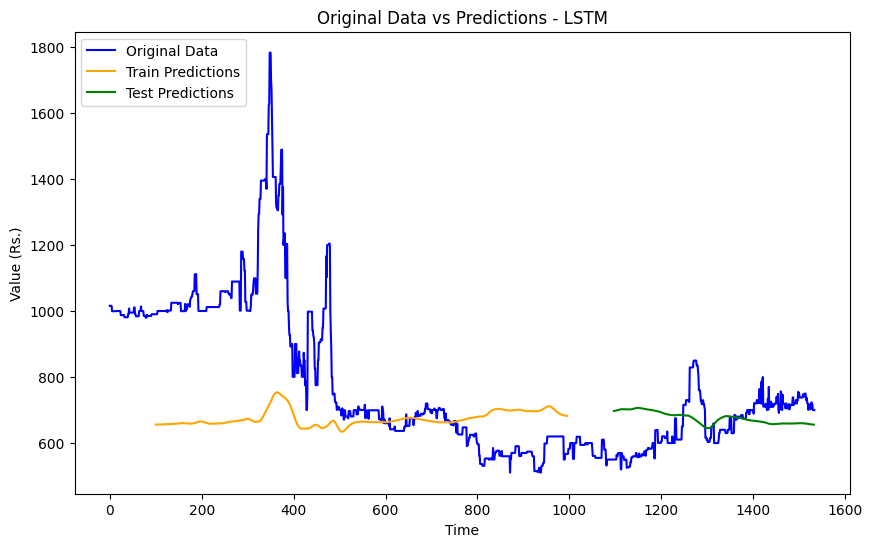

In [51]:
# shift train predictions for plotting
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(df1) - 1, :] = test_predict

# plot baseline and predictions
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(df1), label='Original Data', color='blue')
plt.plot(trainPredictPlot, label='Train Predictions', color='orange')
plt.plot(testPredictPlot, label='Test Predictions', color='green')

# Add title and labels
plt.title('Original Data vs Predictions - LSTM')
plt.xlabel('Time')
plt.ylabel('Value (Rs.)')

# Add a legend
plt.legend(loc='upper left')

# Show the plot
plt.show()

In [52]:
len(test_data)

537

In [53]:
x_input=test_data[437:].reshape(1,-1)
x_input.shape


(1, 100)

In [54]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [55]:
temp_input

[0.20425966677145546,
 0.15710468406161582,
 0.16103426595410242,
 0.16889342973907573,
 0.15710468406161582,
 0.16889342973907573,
 0.15710468406161582,
 0.15710468406161582,
 0.16394215655454258,
 0.15828355862936183,
 0.15710468406161582,
 0.1611914492298019,
 0.16182018233259976,
 0.16496384784658902,
 0.16362779000314354,
 0.16496384784658902,
 0.16496384784658902,
 0.18068217541653564,
 0.16763596353347998,
 0.17384470292360887,
 0.1877554228230116,
 0.1492455202766425,
 0.14217227287016654,
 0.1531751021691291,
 0.1531751021691291,
 0.15113171958503613,
 0.19364979566174156,
 0.18854133920150895,
 0.1665356806035837,
 0.1492455202766425,
 0.18571204023891852,
 0.16496384784658902,
 0.16441370638164088,
 0.1641779314680918,
 0.1641779314680918,
 0.1641779314680918,
 0.15356806035837778,
 0.15325369380697895,
 0.16496384784658902,
 0.15325369380697895,
 0.15631876768311848,
 0.15922665828355864,
 0.15301791889342964,
 0.16103426595410242,
 0.16339201508959444,
 0.15097453630933666

In [56]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.11460847]
101
1 day input [0.15710468 0.16103427 0.16889343 0.15710468 0.16889343 0.15710468
 0.15710468 0.16394216 0.15828356 0.15710468 0.16119145 0.16182018
 0.16496385 0.16362779 0.16496385 0.16496385 0.18068218 0.16763596
 0.1738447  0.18775542 0.14924552 0.14217227 0.1531751  0.1531751
 0.15113172 0.1936498  0.18854134 0.16653568 0.14924552 0.18571204
 0.16496385 0.16441371 0.16417793 0.16417793 0.16417793 0.15356806
 0.15325369 0.16496385 0.15325369 0.15631877 0.15922666 0.15301792
 0.16103427 0.16339202 0.15097454 0.16103427 0.16182018 0.16182018
 0.16103427 0.16103427 0.16103427 0.17895316 0.1795033  0.16103427
 0.16496385 0.16496385 0.16496385 0.16496385 0.17282301 0.16496385
 0.16512103 0.17282301 0.17282301 0.19247092 0.19089909 0.18854134
 0.17911034 0.17911034 0.17911034 0.17911034 0.17911034 0.17911034
 0.17903175 0.18429739 0.18696951 0.18068218 0.18500472 0.18720528
 0.18854134 0.18854134 0.1729016  0.17911034 0.17282301 0.16496385
 0.16457089 0.14963848 0.16339202 

In [57]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [58]:
import matplotlib.pyplot as plt

In [48]:
len(df1)

1534

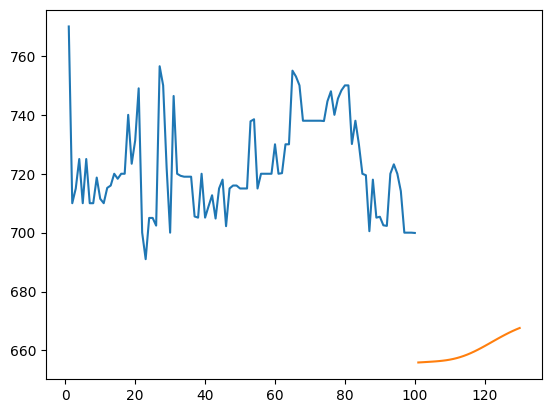

In [49]:
plt.plot(day_new,scaler.inverse_transform(df1[1434:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

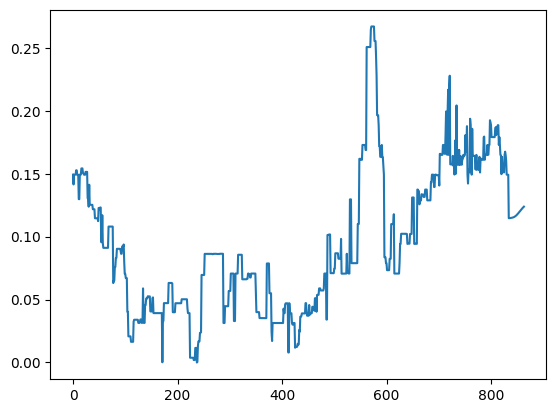

In [50]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[700:])

In [73]:
df3=scaler.inverse_transform(df3).tolist()

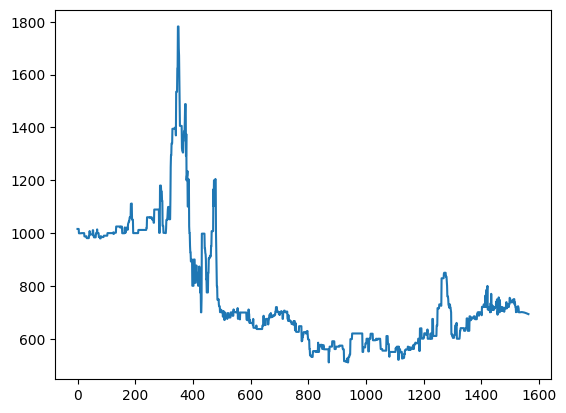

In [74]:
plt.plot(df3)